<a href="https://colab.research.google.com/github/Diksha-Bora/Machine_Learning/blob/main/BaggingClassifier23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BAGGING CLASSIFIER 

In [100]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [101]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["Target"] = iris.target
data.columns = data.columns.str.capitalize()
data.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [102]:
x = data.drop("Target",axis =1 )
y = data["Target"]

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=27,stratify = y)

BAGGING CLASSIFIER WITH NO HYPERPARAMETERS

In [104]:
from sklearn.ensemble import BaggingClassifier
bag_cls = BaggingClassifier()
bag_cls.fit(x_train,y_train)

BaggingClassifier()

In [105]:
y_pred_train = bag_cls.predict(x_train)
y_pred_test = bag_cls.predict(x_test)

In [106]:
from sklearn.metrics import classification_report , confusion_matrix
print("TRAIN")
print("classification_report :\n",classification_report(y_train,y_pred_train))
print("confusion_matrix :\n",confusion_matrix(y_train,y_pred_train))
print("TEST")
print("classification_report :\n",classification_report(y_test,y_pred_test))
print("confusion_matrix :\n",confusion_matrix(y_test,y_pred_test))

TRAIN
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      1.00      0.99        40
           2       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

confusion_matrix :
 [[40  0  0]
 [ 0 40  0]
 [ 0  1 39]]
TEST
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.77      1.00      0.87        10
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30

confusion_matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  3  7]]


BAGGING WITH HYPERPARAMETER 

In [107]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
bag_cls1 = BaggingClassifier(estimator=MultinomialNB(),n_estimators=72,bootstrap=True)
bag_cls1.fit(x_train,y_train)

BaggingClassifier(estimator=MultinomialNB(), n_estimators=72)

In [108]:
y_pred_train1 = bag_cls1.predict(x_train)
y_pred_test1 = bag_cls1.predict(x_test)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix
print("TRAIN")
print("classification_report :\n",classification_report(y_train,y_pred_train1))
print("confusion_matrix :\n",confusion_matrix(y_train,y_pred_train1))
print("TEST")
print("classification_report :\n",classification_report(y_test,y_pred_test1))
print("confusion_matrix :\n",confusion_matrix(y_train,y_pred_train1))
# the accuracy in test is very good as compared to other normal models 

TRAIN
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.93      0.95      0.94        40
           2       0.95      0.93      0.94        40

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

confusion_matrix :
 [[40  0  0]
 [ 0 38  2]
 [ 0  3 37]]
TEST
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion_matrix :
 [[40  0  0]
 [ 0 38  2]
 [ 0  3 37]]


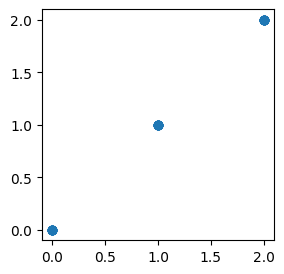

In [110]:
plt.figure(figsize=[3,3])
plt.scatter(y_test,y_pred_test1)